### Sina@DataKind.org

# Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [146]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import os
import datetime as dt


In [3]:
if os.getenv('PUIDATA') is None:
    os.environ['PUIDATA'] = '/Users/mac/Desktop/CUSP/PUI/PUIdata'

In [4]:
print(os.getenv('PUIDATA'))

/Users/mac/Desktop/CUSP/PUI/PUIdata


## Working with Shape File

### Loading Census Tract Shape File¶

In [5]:
from geopandas import GeoDataFrame
shape_path = (os.getenv('PUIDATA') + '/HW10/Data/CT_Shape/ct_shape.shp')
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [6]:
ct_shape

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."
5006400,5006400,5,Staten Island,I,006400,64,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,7.643184e+06,12726.360406,POLYGON ((-74.07643744511992 40.60100160655585...
5007400,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948475,POLYGON ((-74.05974734759452 40.59384861156719...
5018701,5018701,5,Staten Island,I,018701,187.01,SI07,Westerleigh,3903,4.267476e+06,8626.771269,POLYGON ((-74.12135179626247 40.60976526815898...
1002202,1002202,1,Manhattan,I,002202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,POLYGON ((-73.97823073299477 40.72067428669261...


### Coordinate systems, projections, and transformations 

In [7]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print('total NYC land area: %s (mi^2)'%str(NYC_Area)[:5]) # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


In [8]:
ct_shape.crs

{'init': 'epsg:4326', 'no_defs': True}

### Visualize the Cencus Tract boundaries colored by boroughs

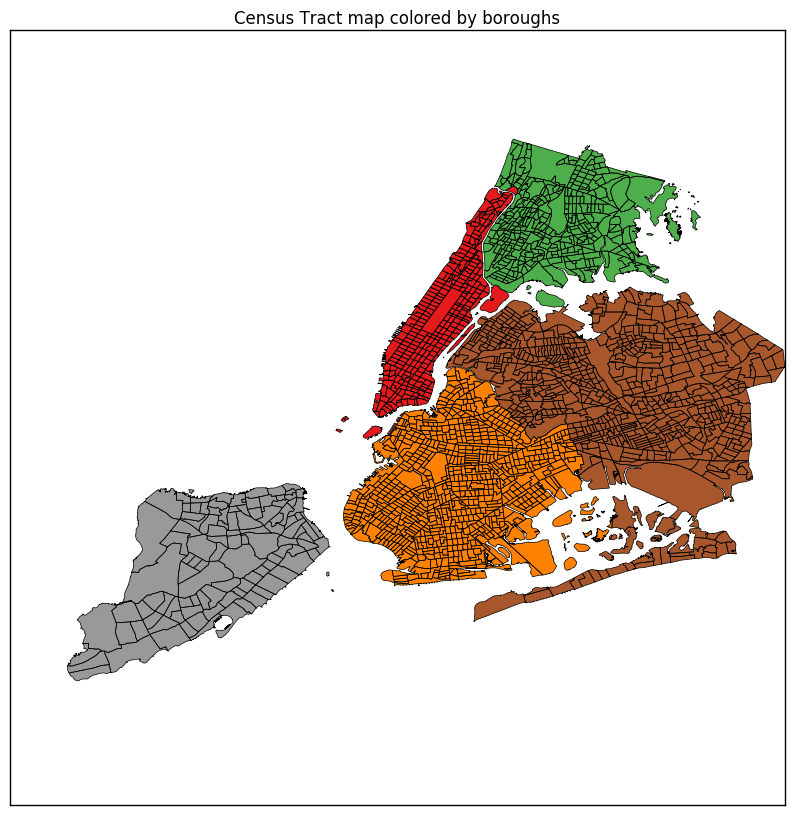

In [9]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [10]:
ct_data=DataFrame.from_csv(os.getenv('PUIDATA') + '/HW10/Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [11]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

In [ ]:
#ct_shape_pop

#### Vusualize the Population density for 2010

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


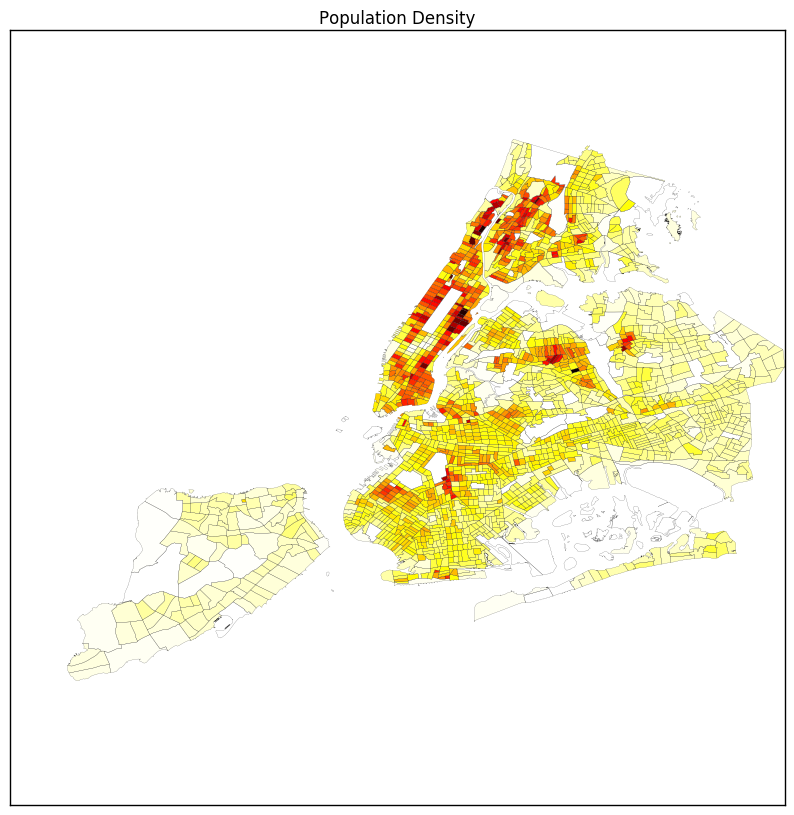

In [12]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [13]:
df_bike_monthly=DataFrame.from_csv(os.getenv('PUIDATA') + '/HW10/Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


### Time Series Aanalysis

In [14]:
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.index

Index(['July 2013', 'August 2013', 'September 2013', 'October 2013',
       'November 2013', 'December 2013', 'January 2014', 'February 2014',
       'March 2014', 'April 2014', 'May 2014', 'June 2014', 'July 2014',
       'August 2014', 'September 2014', 'October 2014', 'November 2014',
       'December 2014', 'January 2015', 'February 2015', 'March 2015',
       'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015',
       'September 2015', 'October 2015', 'November 2015', 'December 2015',
       'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016',
       'June 2016'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

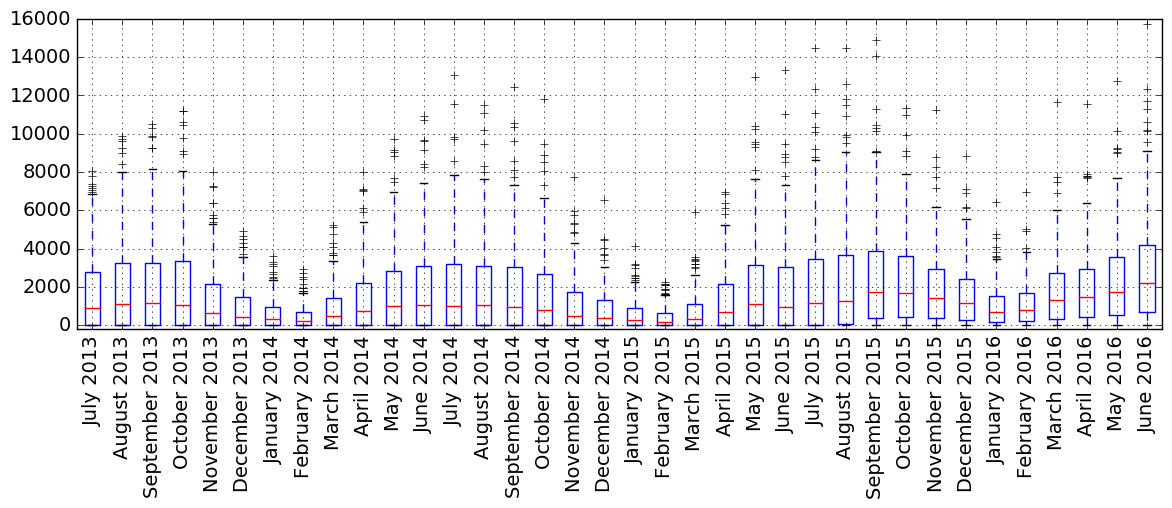

In [15]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


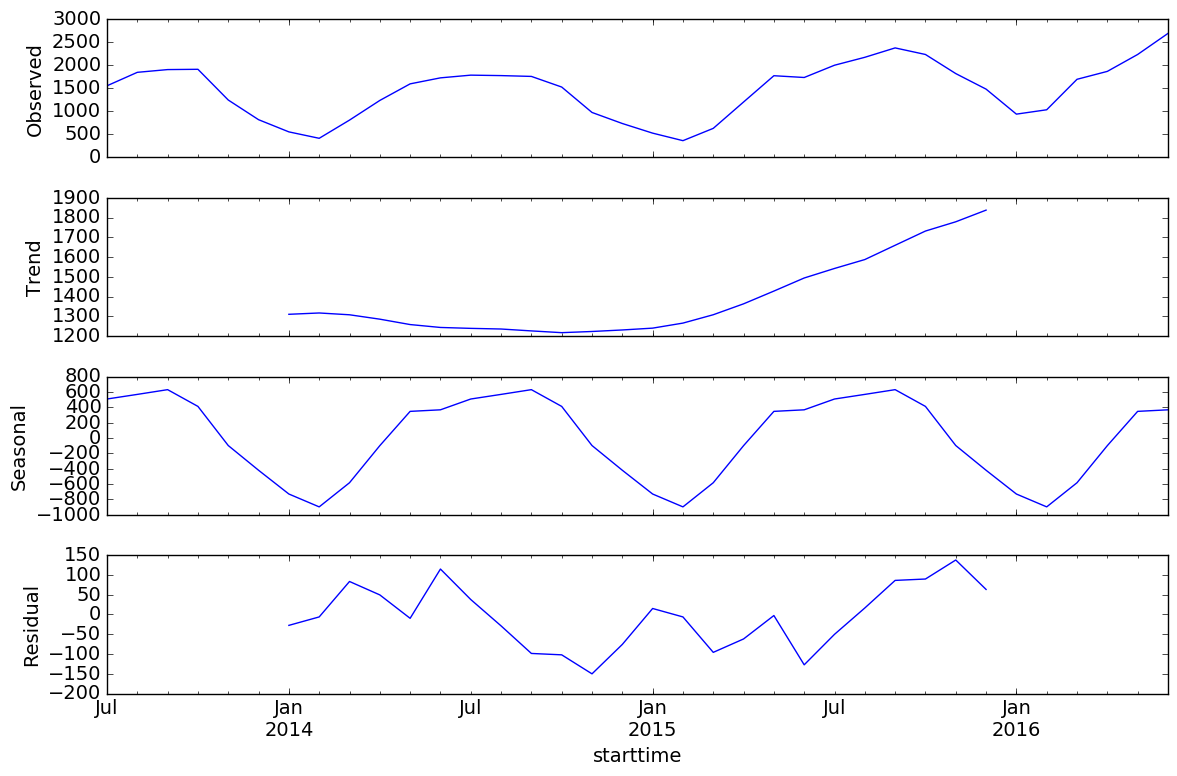

In [16]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [17]:
station_id=DataFrame.from_csv(os.getenv('PUIDATA') + '/HW10/Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [18]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=list(zip(station_id.lon,station_id.lat))
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [19]:
ct_shape[ct_shape.geometry.intersects(station_id.iloc[1].geometry)].BoroCT2010.values

array(['1009900'], dtype=object)

In [20]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print('\r',"%",str((i+1)*100./len(station_id))[:4],)
station_id['BoroCT2010']=a

 % 0.18
 % 0.36
 % 0.55
 % 0.73
 % 0.92
 % 1.10
 % 1.28
 % 1.47
 % 1.65
 % 1.84
 % 2.02
 % 2.20
 % 2.39
 % 2.57
 % 2.76
 % 2.94
 % 3.13
 % 3.31
 % 3.49
 % 3.68
 % 3.86
 % 4.05
 % 4.23
 % 4.41
 % 4.60
 % 4.78
 % 4.97
 % 5.15
 % 5.34
 % 5.52
 % 5.70
 % 5.89
 % 6.07
 % 6.26
 % 6.44
 % 6.62
 % 6.81
 % 6.99
 % 7.18
 % 7.36
 % 7.55
 % 7.73
 % 7.91
 % 8.10
 % 8.28
 % 8.47
 % 8.65
 % 8.83
 % 9.02
 % 9.20
 % 9.39
 % 9.57
 % 9.76
 % 9.94
 % 10.1
 % 10.3
 % 10.4
 % 10.6
 % 10.8
 % 11.0
 % 11.2
 % 11.4
 % 11.6
 % 11.7
 % 11.9
 % 12.1
 % 12.3
 % 12.5
 % 12.7
 % 12.8
 % 13.0
 % 13.2
 % 13.4
 % 13.6
 % 13.8
 % 13.9
 % 14.1
 % 14.3
 % 14.5
 % 14.7
 % 14.9
 % 15.1
 % 15.2
 % 15.4
 % 15.6
 % 15.8
 % 16.0
 % 16.2
 % 16.3
 % 16.5
 % 16.7
 % 16.9
 % 17.1
 % 17.3
 % 17.4
 % 17.6
 % 17.8
 % 18.0
 % 18.2
 % 18.4
 % 18.6
 % 18.7
 % 18.9
 % 19.1
 % 19.3
 % 19.5
 % 19.7
 % 19.8
 % 20.0
 % 20.2
 % 20.4
 % 20.6
 % 20.8
 % 20.9
 % 21.1
 % 21.3
 % 21.5
 % 21.7
 % 21.9
 % 22.0
 % 22.2
 % 22.4
 % 22.6
 % 22.8
 % 23.0


In [21]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [50]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['Summer'] = df_bike_monthly[(df_bike_monthly.index.month > 2) & (df_bike_monthly.index.month < 9)].sum()
station_id['Winter'] = df_bike_monthly[(df_bike_monthly.index.month < 3) | (df_bike_monthly.index.month > 8)].sum()

In [52]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,Summer,Winter
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,37811,31497
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,59289,43535
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,154020,119505
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,57679,44270
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,102895,81149


### Add the monthly average rides to the CT shapefile 

In [53]:
# use the 
temp=station_id[['Summer']]
temp['Winter'] = station_id['Winter'] 
temp['station_id'] = station_id.index
temp.index = station_id['BoroCT2010']
ct_shape_MonthlyAve = ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)
ct_shape_MonthlyAve.head(3)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Summer,Winter,station_id
BoroCT2010,,,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0,0.0,0
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0,0.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,24875.0,13971.0,1197


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


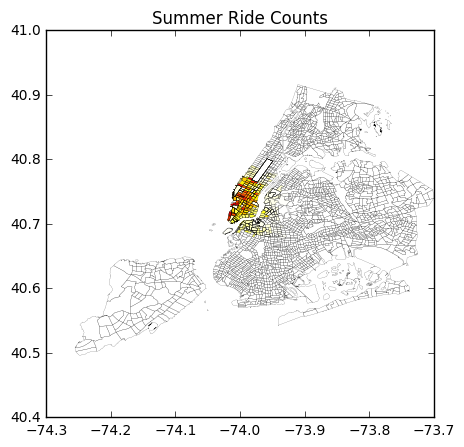

In [55]:
f, ax = plt.subplots(figsize=(5,5))
ct_shape_MonthlyAve.plot(column='Summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Ride Counts")

### Removing the CTs that are out of zoom boundries

In [56]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [58]:
print("Total number of CTs:", len(ct_shape))
print("Number of zoomed CTs:", len(temp.Summer))

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


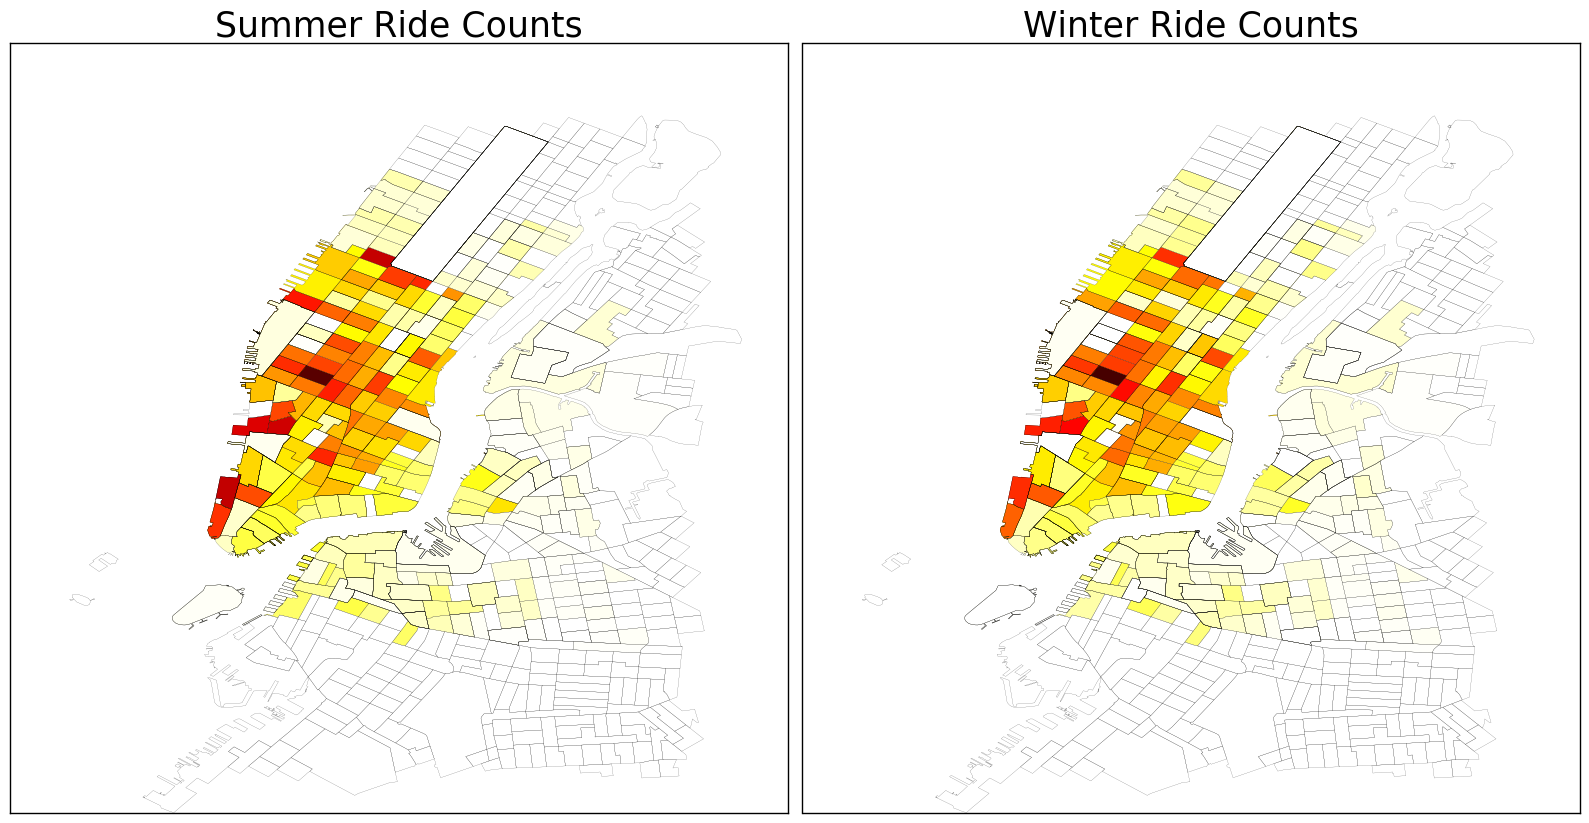

In [73]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='Summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
ct_shape_MonthlyAve_Zoom.plot(column='Winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax2)
fig.tight_layout()

ax1.set_title('Summer Ride Counts', fontsize = 25)
ax2.set_title('Winter Ride Counts', fontsize = 25)

### Export Shapefile CTs in the CitiBike Zone

In [74]:
path = (os.getenv('PUIDATA') + '/HW10/Output/ct_shape_MonthlyAve_Zoom.shp')
ct_shape_MonthlyAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [75]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [76]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [77]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [78]:
qW_CT.cardinalities[10] #Number of neighbors for each observation.

9

#### Matrix of Weights

In [79]:
Wmatrix, ids = qW_CT.full()

In [80]:
Wmatrix # ids associated with each row in the array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [81]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [82]:
SummerRide=ct_shape_MonthlyAve_Zoom.Summer
SummerRideLag=ps.lag_spatial(qW_CT, SummerRide)

WinterRide=ct_shape_MonthlyAve_Zoom.Winter
WinterRideLag=ps.lag_spatial(qW_CT, WinterRide)

In [83]:
ct_shape_MonthlyAve_Zoom.shape

(796, 15)

#### Create Quantiles for maping

In [86]:
SummerRideLagQ10 = ps.Quantiles(SummerRideLag, k=10)
SummerRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               140
    0.000 < x[i] <=   117.714                21
  117.714 < x[i] <=  2265.850                78
 2265.850 < x[i] <=  5139.800                80
 5139.800 < x[i] <= 10093.650                79
10093.650 < x[i] <= 15484.867                80
15484.867 < x[i] <= 33398.440                79
33398.440 < x[i] <= 48054.864                80
48054.864 < x[i] <= 55933.250                79
55933.250 < x[i] <= 86481.286                80

In [87]:
WinterRideLagQ10 = ps.Quantiles(WinterRideLag, k=10)
WinterRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=   119.857                 2
  119.857 < x[i] <=  1876.750                78
 1876.750 < x[i] <=  4509.059                80
 4509.059 < x[i] <=  7565.413                79
 7565.413 < x[i] <= 11064.048                80
11064.048 < x[i] <= 24831.318                79
24831.318 < x[i] <= 34872.071                80
34872.071 < x[i] <= 41156.721                79
41156.721 < x[i] <= 65502.071                80

#### Map the monthly rides lag

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


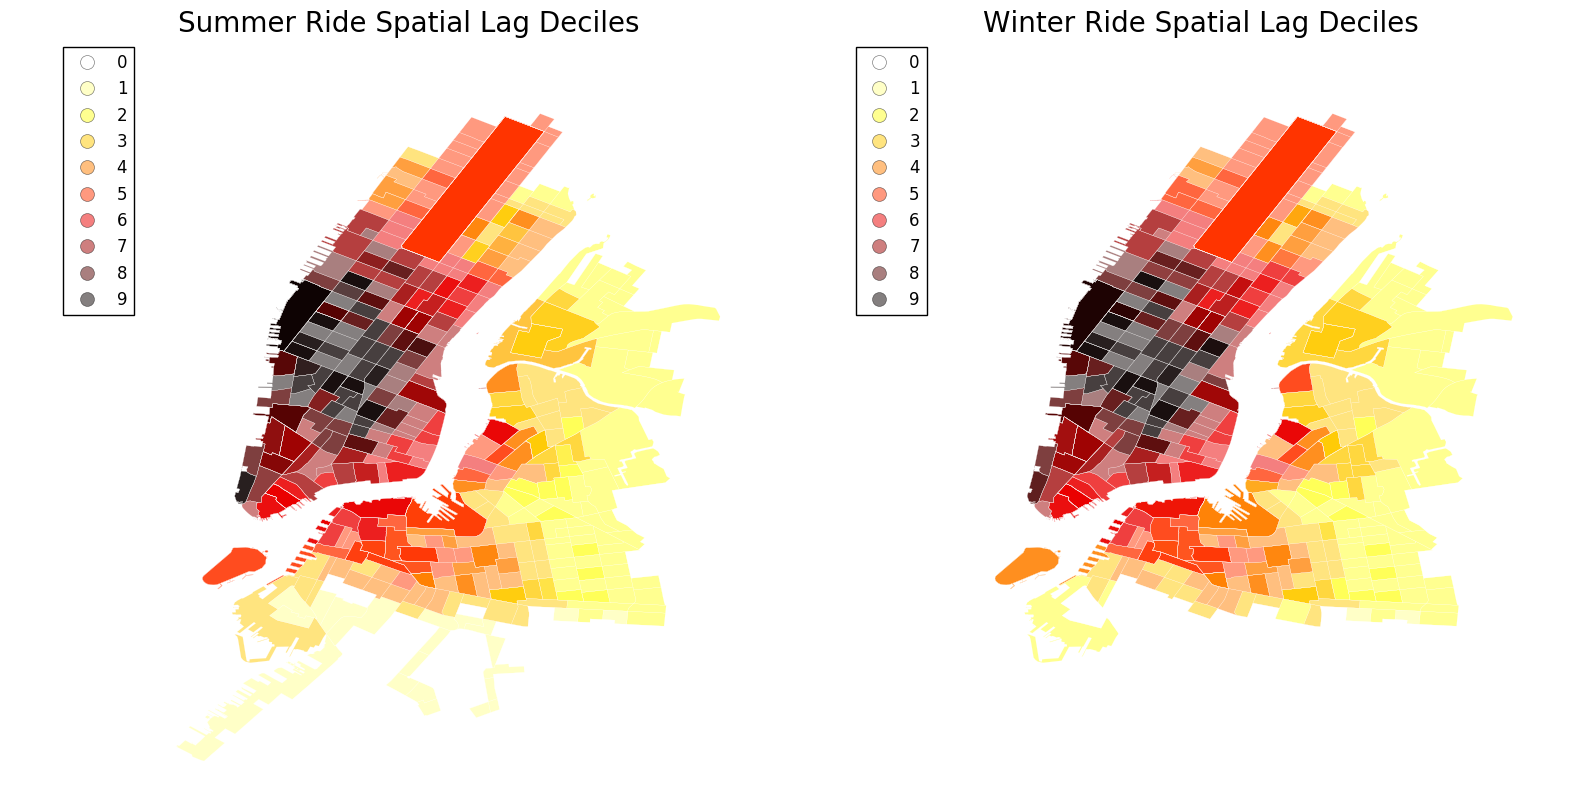

In [92]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ct_shape_MonthlyAve_Zoom.assign(cl=SummerRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ct_shape_MonthlyAve_Zoom.assign(cl=WinterRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
ax2.set_axis_off()
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax1.set_title('Summer Ride Spatial Lag Deciles', fontsize = 20)
ax2.set_title('Winter Ride Spatial Lag Deciles', fontsize = 20)

fig.tight_layout()

## Global  Spatial Autocorrelation

In [93]:
#For Summer
b_s, a_s = np.polyfit(SummerRide, SummerRideLag, 1)
b_s, a_s 

(0.6474253795506294, 7381.8510048866628)

In [94]:
#For Winter
b_w, a_w = np.polyfit(WinterRide, WinterRideLag, 1)
b_w, a_w

(0.65415251016634168, 5368.4517010711461)

### Moran Scatterplot

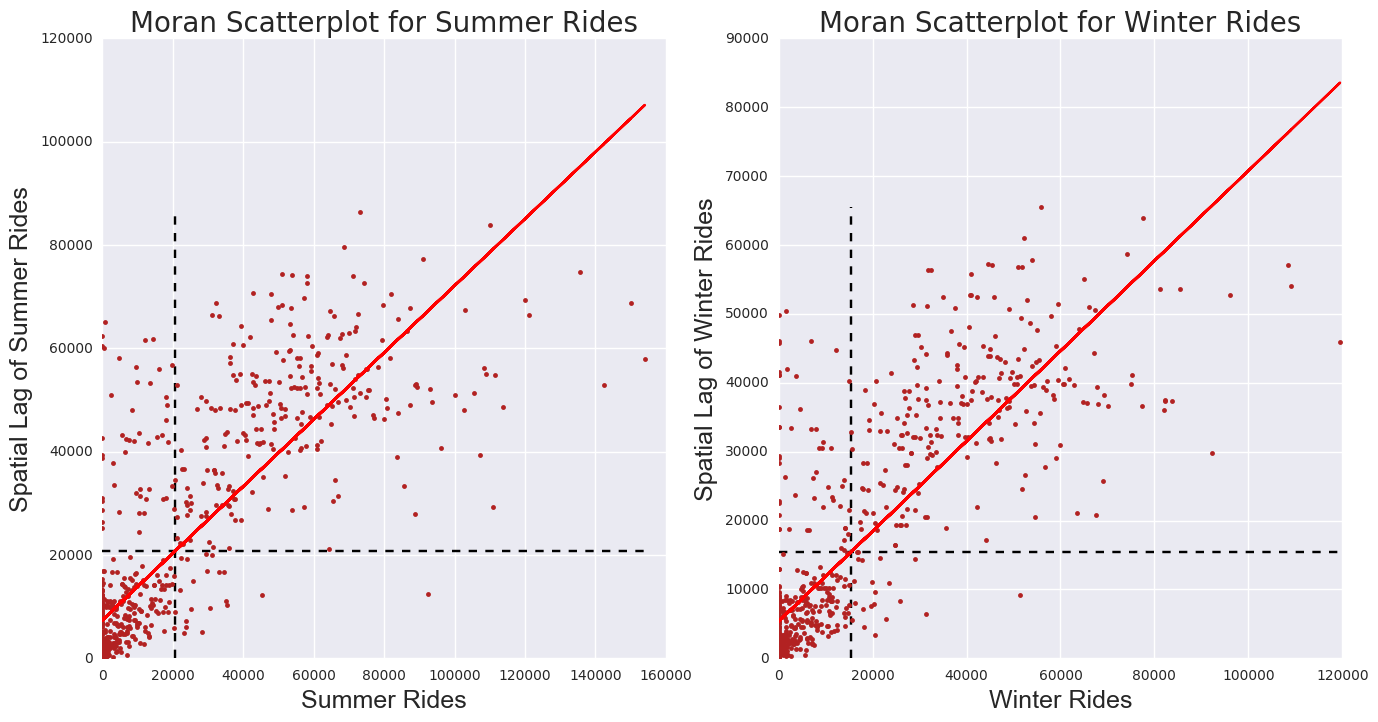

In [161]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(SummerRide, SummerRideLag, '.', color='firebrick')
ax1.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
ax1.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')
ax2.plot(WinterRide, WinterRideLag, '.', color='firebrick')
ax2.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
ax2.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax1.plot(SummerRide, a_s + b_s * SummerRide, 'r')
ax2.plot(WinterRide, a_w + b_w * WinterRide, 'r')
ax1.set_title('Moran Scatterplot for Summer Rides', fontsize = 20)
ax1.set_ylabel('Spatial Lag of Summer Rides', fontsize = 18)
ax1.set_xlabel('Summer Rides', fontsize = 18)

ax2.set_title('Moran Scatterplot for Winter Rides', fontsize = 20)
ax2.set_ylabel('Spatial Lag of Winter Rides', fontsize = 18)
ax2.set_xlabel('Winter Rides', fontsize = 18)

### Moran's I

#### For summer

In [115]:
I_SummerRide = ps.Moran(SummerRide, qW_CT)

In [116]:
I_SummerRide.I, I_SummerRide.p_sim

(0.64757795598496704, 0.001)

#### For winter

In [117]:
I_WinterRide = ps.Moran(WinterRide, qW_CT)

In [118]:
I_WinterRide.I, I_WinterRide.p_sim

(0.65431284847496418, 0.001)

Thus, the $I$ statistics are $0.647$ and $0.654$ for the summer and winter data respectively, and both have a very small $p$ value ~ $0.01$. 

In [119]:
I_SummerRide.sim[0:10]

array([ -6.66300492e-05,  -1.31252935e-02,   5.49905789e-02,
        -2.77323308e-02,  -1.18956993e-02,   1.77308105e-03,
        -2.04884168e-02,  -1.80352075e-03,   5.85720261e-03,
         2.02223940e-02])

In [120]:
I_WinterRide.sim[0:10]

array([-0.02181416,  0.01859824, -0.01144236,  0.00141721,  0.00164449,
       -0.02536896,  0.0044616 ,  0.00309693,  0.02736314,  0.0253667 ])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [122]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-0.7, 0.7)

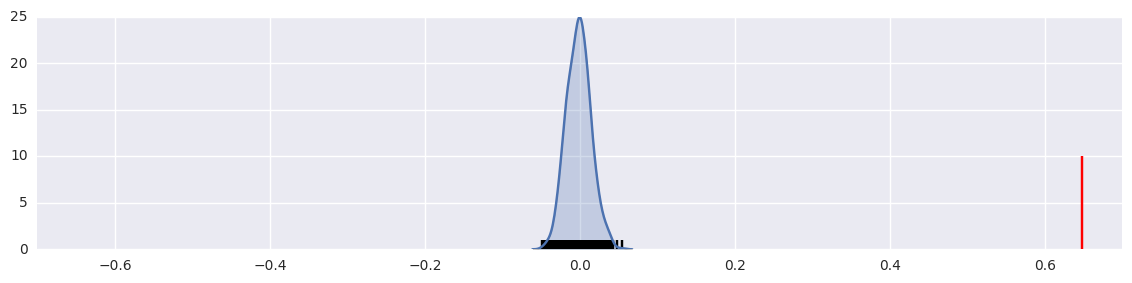

In [123]:
sns.kdeplot(I_SummerRide.sim, shade=True)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-0.7, 0.7)

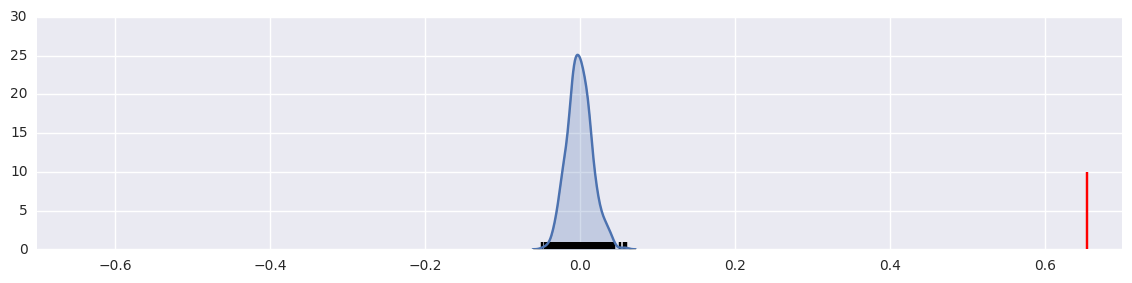

In [124]:
sns.kdeplot(I_WinterRide.sim, shade=True)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-0.7, 0.7)

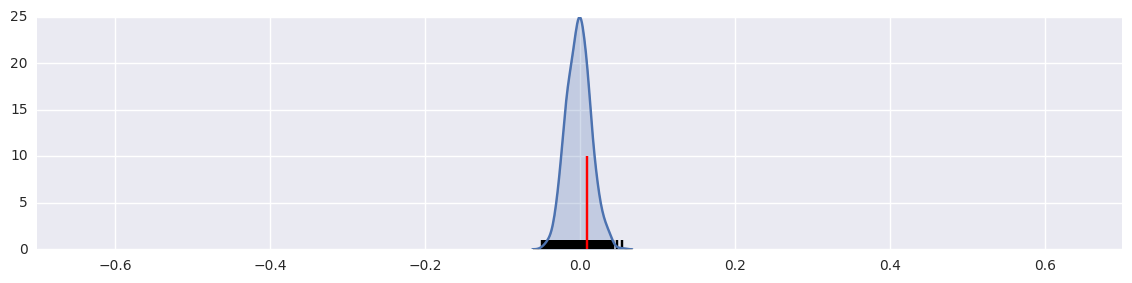

In [125]:
sns.kdeplot(I_SummerRide.sim, shade=True)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-0.7, 0.7)

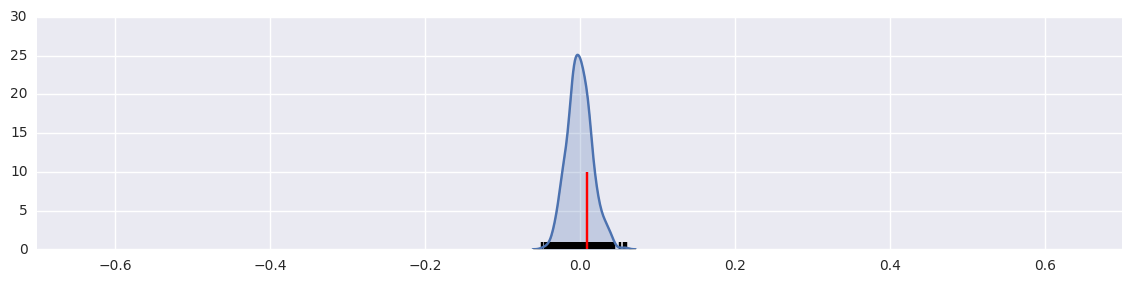

In [126]:
sns.kdeplot(I_WinterRide.sim, shade=True)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [127]:
LMo_SummerRide = ps.Moran_Local(SummerRide, qW_CT,permutations=999)

In [128]:
LMo_SummerRide.Is[0:5], LMo_SummerRide.p_sim[0:5]

(array([-0.        , -0.24944556,  0.01176949,  0.00157105,  0.02150326]),
 array([ 0.001,  0.181,  0.355,  0.381,  0.369]))

In [131]:
LMo_WinterRide = ps.Moran_Local(WinterRide, qW_CT,permutations=999)

In [132]:
LMo_WinterRide.Is[0:5], LMo_WinterRide.p_sim[0:5]

(array([ -0.00000000e+00,  -2.54289768e-01,  -8.49562917e-04,
          1.12122005e-04,  -2.93415998e-02]),
 array([ 0.001,  0.178,  0.45 ,  0.446,  0.453]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [137]:
sigs_sm = SummerRide[LMo_SummerRide.p_sim <= .001]
W_sigs_sm = SummerRideLag[LMo_SummerRide.p_sim <= .001]
insigs_sm = SummerRide[LMo_SummerRide.p_sim > .001]
W_insigs_sm = SummerRideLag[LMo_SummerRide.p_sim > .001]

In [138]:
sigs_wt = WinterRide[LMo_WinterRide.p_sim <= .001]
W_sigs_wt = WinterRideLag[LMo_WinterRide.p_sim <= .001]
insigs_wt = WinterRide[LMo_WinterRide.p_sim > .001]
W_insigs_wt = WinterRideLag[LMo_WinterRide.p_sim > .001]

### Plot Signficant LISA

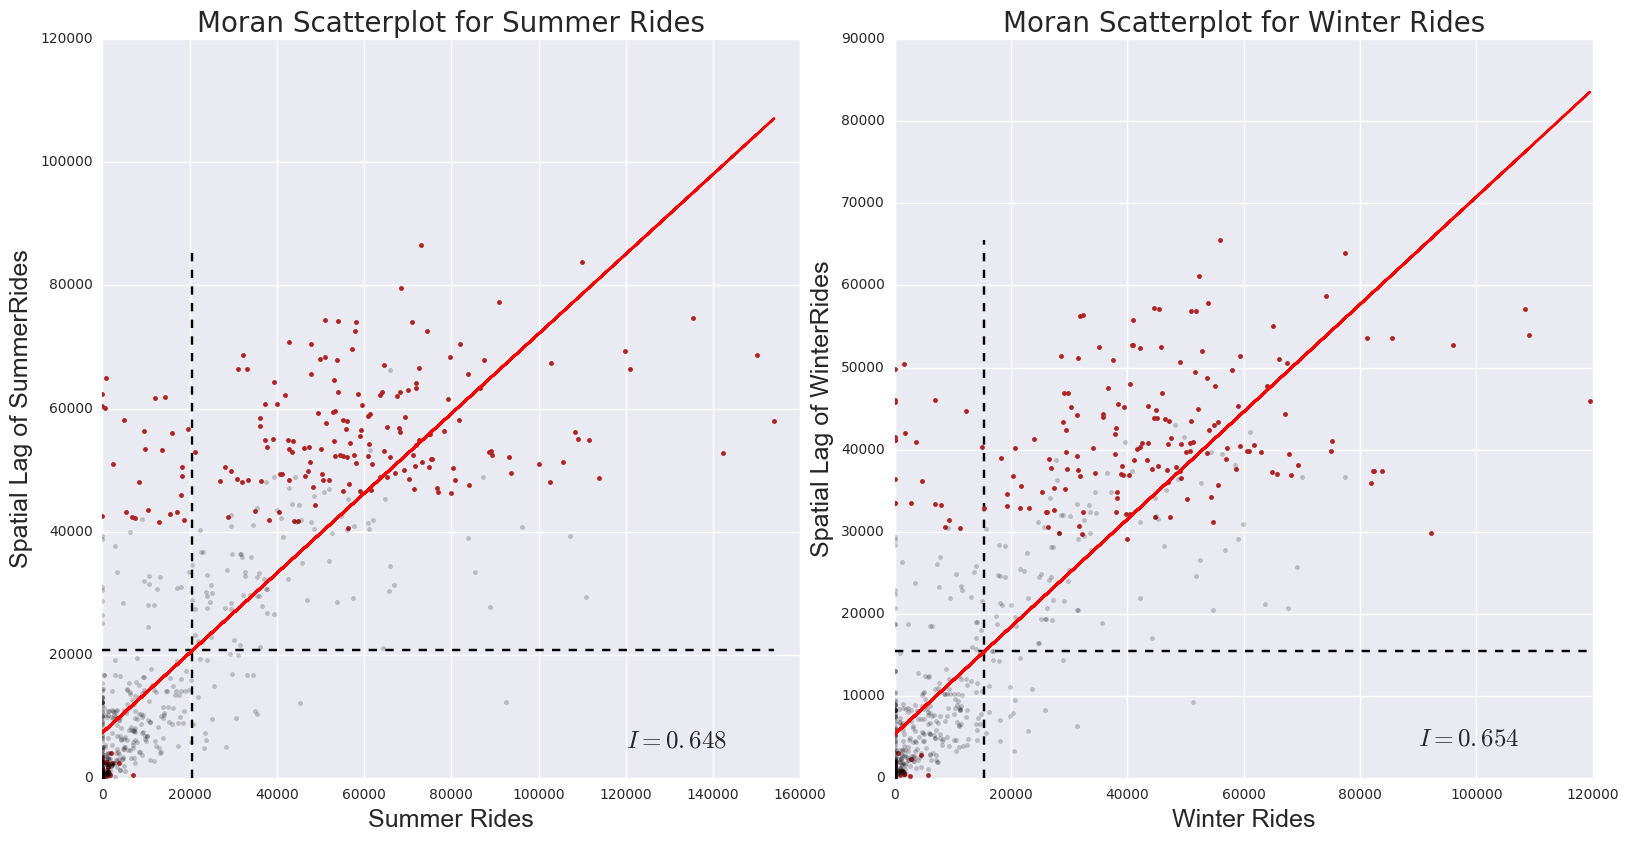

In [163]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(sigs_sm, W_sigs_sm, '.', color='firebrick')
ax1.plot(insigs_sm, W_insigs_sm, '.k', alpha=.2)
ax1.text(s='$I = %.3f$' % I_SummerRide.I, x=120000, y=5000, fontsize=18)

ax2.plot(sigs_wt, W_sigs_wt, '.', color='firebrick')
ax2.plot(insigs_wt, W_insigs_wt, '.k', alpha=.2)
ax2.text(s='$I = %.3f$' % I_WinterRide.I, x=90000, y=4000, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax1.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax1.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')

ax2.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
ax2.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

fig.tight_layout()
# red line of best fit using global I as slope
ax1.plot(SummerRide, a_s + b_s * SummerRide, 'r')
ax1.set_title('Moran Scatterplot for Summer Rides', fontsize = 20)
ax1.set_ylabel('Spatial Lag of SummerRides', fontsize = 18)
ax1.set_xlabel('Summer Rides', fontsize = 18)

ax2.plot(WinterRide, a_w + b_w * WinterRide, 'r')
ax2.set_title('Moran Scatterplot for Winter Rides', fontsize = 20)
ax2.set_ylabel('Spatial Lag of WinterRides', fontsize = 18)
ax2.set_xlabel('Winter Rides', fontsize = 18)


### Hot and Cold spots 

In [151]:
sig_s = LMo_SummerRide.p_sim < 0.01
hotspots_s = LMo_SummerRide.q==1 * sig_s
coldspots_s = LMo_SummerRide.q==3 * sig_s
print("Number of Hotspots in Summer:", hotspots_s.sum())
print("Number of Coldspots in Summer:", coldspots_s.sum())

Number of Hotspots in Summer: 188
Number of Coldspots in Summer: 236


In [152]:
sig_w = LMo_WinterRide.p_sim < 0.01
hotspots_w = LMo_WinterRide.q==1 * sig_w
coldspots_w = LMo_WinterRide.q==3 * sig_w
print("Number of Hotspots in Winter:", hotspots_w.sum())
print("Number of Coldspots in Winter:", coldspots_w.sum())

Number of Hotspots in Winter: 190
Number of Coldspots in Winter: 217


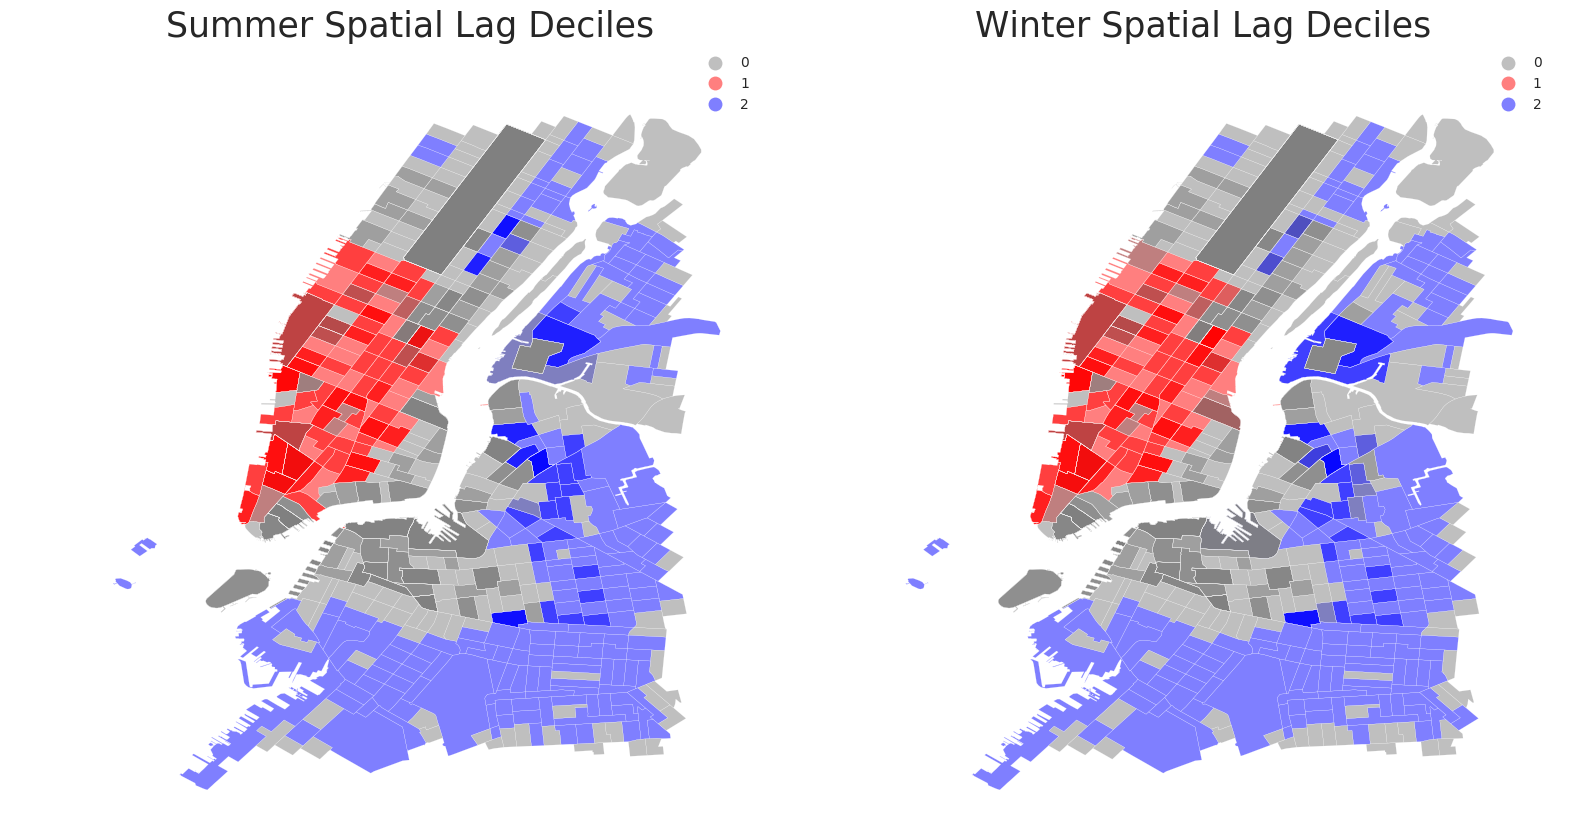

In [155]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_s = hotspots_s*1 + coldspots_s*2
hotcold_w = hotspots_w*1 + coldspots_w*2

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ct_shape_MonthlyAve_Zoom.assign(cl=hotcold_s).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold_w).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)

ax1.set_axis_off()
ax2.set_axis_off()

fig.tight_layout()

ax1.set_title('Summer Spatial Lag Deciles', fontsize = 25)
ax2.set_title('Winter Spatial Lag Deciles', fontsize = 25)